### Imports

In [4]:
import openai
import os
import inspect

### Get API keys

In [2]:
openai.api_key = os.getenv('OPENAI_API_KEY')

In [3]:
# Python language
# function (OOP)
# """ """

### Example function

In [5]:
def hello(name):
    print(f"Hello {name}")

### Initial Prompt

In [7]:
def docstring_prompt(code):
    prompt = f"{code}\n # A high quality python docstring of the above Python function:\n \"\"\""
    return prompt

In [8]:
print(docstring_prompt(inspect.getsource(hello)))

def hello(name):
    print(f"Hello {name}")

 # A high quality python docstring of the above Python function:
 """


### Test initial Prompt

In [37]:
response = openai.Completion.create(
    engine='text-davinci-003',
    prompt = docstring_prompt(inspect.getsource(hello)),
    temperature = 0,
    max_tokens = 100,
    top_p = 1.0,
    stop=["\"\"\""]

)

In [38]:
print(response['choices'][0]['text'])


This function prints a greeting to the given name.

Parameters:
name (str): The name of the person to greet.

Returns:
None
 


In [39]:
# first line of the function
# """ """
# DOCstring (completion api)
# """
# Rest of the function

### Combine docstring and function

In [46]:
def merge_docstring_and_function(original_function, docstring):
    function_string = inspect.getsource(original_function)

    split = function_string.split('\n')
    first_part,second_part = split[0],split[1:]

    merged_function = first_part + '\n """'+docstring+' """'+'\n'+'\n'.join(second_part)
    return merged_function

In [47]:
print(merge_docstring_and_function(hello, response['choices'][0]['text']))

def hello(name):
 """
This function creates a student view of a test.

Parameters:
test (str): The test to be converted into a student view.
num_questions (int): The number of questions in the test.

Returns:
student_view (dict): A dictionary containing the student view of the test.

 """
    print(f"Hello {name}")



### Example function 2

In [48]:
def create_student_view(test, num_questions):
    student_view = {1 : ""}
    question_number = 1
    for line in test.split("\n"):
        if not line.startswith("Correct Answer:"):
            student_view[question_number] += line+"\n"
        else:

            if question_number < num_questions:
                question_number+=1
                student_view[question_number] = ""
    return student_view

### OpenAI call to generate doctring

In [54]:
def create_docstring(function):
    response = openai.Completion.create(
        engine='text-davinci-003',
        prompt = docstring_prompt(inspect.getsource(function)),
        temperature = 0,
        max_tokens = 100,
        top_p = 1.0,
        stop=["\"\"\""]

    )
    print(merge_docstring_and_function(function, response['choices'][0]['text']))

In [55]:
create_docstring(create_student_view)

def create_student_view(test, num_questions):
 """
This function creates a student view of a test.

Parameters:
test (str): The test to be converted into a student view.
num_questions (int): The number of questions in the test.

Returns:
student_view (dict): A dictionary containing the student view of the test.

 """
    student_view = {1 : ""}
    question_number = 1
    for line in test.split("\n"):
        if not line.startswith("Correct Answer:"):
            student_view[question_number] += line+"\n"
        else:

            if question_number < num_questions:
                question_number+=1
                student_view[question_number] = ""
    return student_view



In [57]:
create_docstring(hello)

def hello(name):
 """
This function prints a greeting to the given name.

Parameters:
name (str): The name of the person to greet.

Returns:
None
  """
    print(f"Hello {name}")



### Example function 3

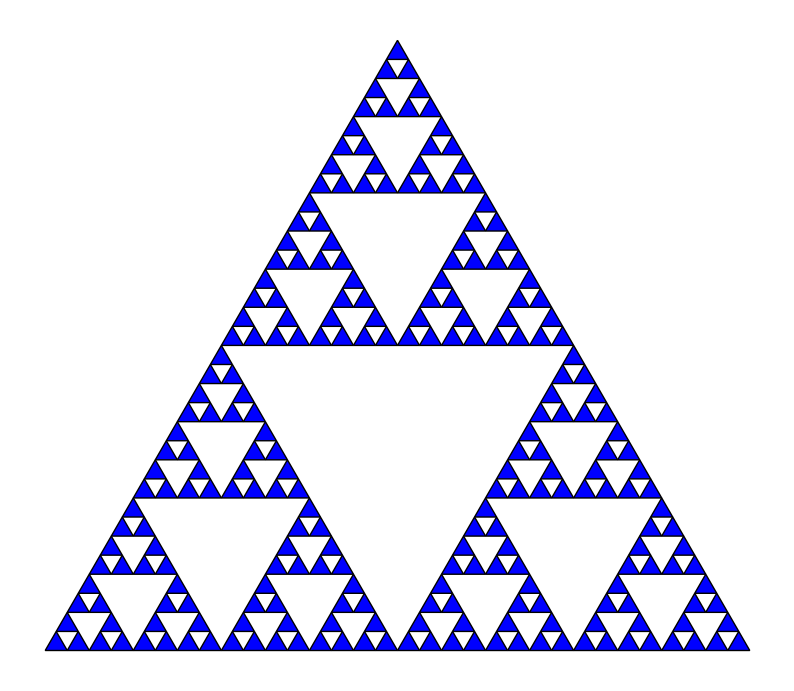

In [58]:
def sierpinski_triangle(n):
    def draw_triangle(x, y, size):
        points = [(x, y), (x + size, y), (x + size / 2, y + size * 3**0.5 / 2)]
        plt.fill(*zip(*points), 'b', edgecolor='black')

    def recursive_triangle(x, y, size, depth):
        if depth == 0:
            draw_triangle(x, y, size)
        else:
            recursive_triangle(x, y, size / 2, depth - 1)
            recursive_triangle(x + size / 2, y, size / 2, depth - 1)
            recursive_triangle(x + size / 4, y + size * 3**0.5 / 4, size / 2, depth - 1)

    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 10))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis('off')
    recursive_triangle(0, 0, n, 5)
    plt.show()

# Example usage:
sierpinski_triangle(500)


In [59]:
create_docstring(sierpinski_triangle)

def sierpinski_triangle(n):
 """
 This function draws a Sierpinski triangle of a given size.
 
 Parameters:
 n (int): The size of the triangle.
 
 Returns:
 None
 
 Example:
 sierpinski_triangle(10)
 
  """
    def draw_triangle(x, y, size):
        points = [(x, y), (x + size, y), (x + size / 2, y + size * 3**0.5 / 2)]
        plt.fill(*zip(*points), 'b', edgecolor='black')

    def recursive_triangle(x, y, size, depth):
        if depth == 0:
            draw_triangle(x, y, size)
        else:
            recursive_triangle(x, y, size / 2, depth - 1)
            recursive_triangle(x + size / 2, y, size / 2, depth - 1)
            recursive_triangle(x + size / 4, y + size * 3**0.5 / 4, size / 2, depth - 1)

    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 10))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis('off')
    recursive_triangle(0, 0, n, 5)
    plt.show()

